In [5]:
#importing the libraries
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd


In [6]:
#importing the dataset
dataset=pd.read_csv('Position_Salaries.csv')
X=dataset.iloc[: ,1:-1].values
Y=dataset.iloc[ : ,-1].values
#X-->contain level column only
#Y-->contain only salary column

In [8]:
print(X)
print(Y)

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]
[  45000   50000   60000   80000  110000  150000  200000  300000  500000
 1000000]


In [13]:
#Training the Linear Regression model on the whole dataset
from sklearn.linear_model import LinearRegression
lin_reg=LinearRegression()
lin_reg.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [10]:
import statsmodels.formula.api as sm
# Fitting the OLS on data
model = sm.ols('Salary~Level', dataset).fit()
print(model.params)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Intercept   -195333.333333
Level         80878.787879
dtype: float64


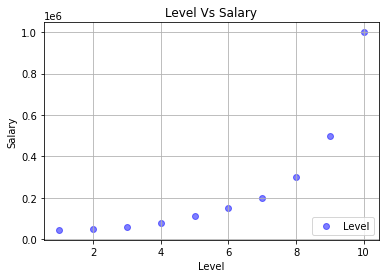

In [11]:
#plt.scatter(dataset.TV, dataset.sales, color='blue', label='TV', alpha=0.5)
plt.scatter(dataset.Level, dataset.Salary, color='blue', label='Level', alpha=0.5)


plt.legend(loc="lower right")
plt.title("Level Vs Salary")
plt.xlabel("Level")
plt.ylabel("Salary")
plt.grid()
plt.show()

In [15]:
#Training the polynomial Regression model on the whole dataset.
from sklearn.preprocessing import PolynomialFeatures
poly_reg=PolynomialFeatures(degree=4)
#-->combination of matrix power of 4
X_poly=poly_reg.fit_transform(X)
#-->transform linear to polynomial
lin_reg2=LinearRegression()
#new position matrix
lin_reg2.fit(X_poly,Y)
#-->to create this Y=B1+X1B2+B3X2^2+B4X1^3+B5X4^4 



LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

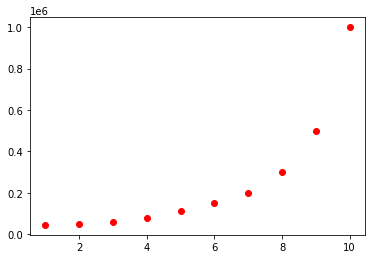

In [16]:
#Visiualising the Linear Regression result
plt.scatter(X,Y,color='red')

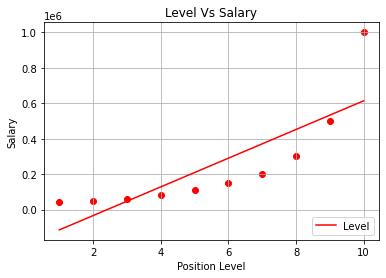

In [22]:
plt.plot(X, lin_reg.predict(X), color='red', label='Level', alpha=1)
plt.scatter(X,Y,color='red')
plt.legend(loc="lower right")
plt.title("Level Vs Salary")
plt.xlabel("Position Level")
plt.ylabel("Salary")
plt.grid()
plt.show()


No handles with labels found to put in legend.


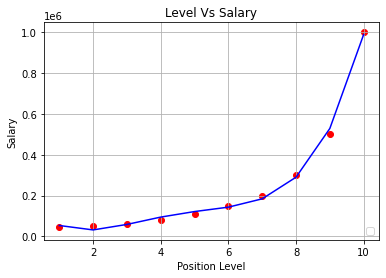

In [25]:
#Visiualising The polynomial Regression result all of the same except this one
plt.plot(X,lin_reg2.predict(poly_reg.fit_transform(X)),color='blue')
plt.scatter(X,Y,color='red')
plt.legend(loc="lower right")
plt.title("Level Vs Salary")
plt.xlabel("Position Level")
plt.ylabel("Salary")
plt.grid()
plt.show()



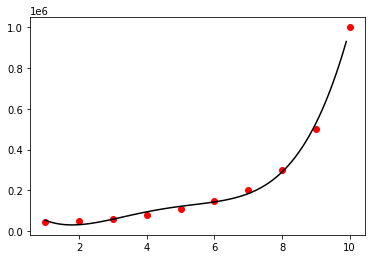

In [26]:
#Visiualising The polynomial Regression result for higher resolution and smother curve
X_grid=np.arange(min(X),max(X),0.1)
X_grid=X_grid.reshape(len(X_grid),1)
plt.scatter(X,Y,color='red')
plt.plot(X_grid,lin_reg2.predict(poly_reg.fit_transform(X_grid)),color='black')

In [30]:
#Predict a new result with LR
lin_reg.predict([[6.5]])
#Predict a new result with PR
lin_reg.predict(poly_reg.fit_transform([[6.5]]))


ValueError: ignored

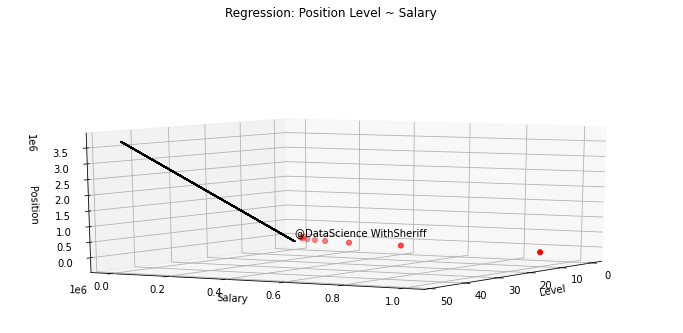

In [33]:
#3D plot
from mpl_toolkits import mplot3d
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(12,10))
ax = fig.add_subplot(211, projection='3d')

fig.suptitle('Regression: Position Level ~ Salary')


# Defining z function (or sales in terms of TV and radio)
def z_function(x,y):
    return (-195333.333333 + (y) + (80878.787879*x))

X, Y = np.meshgrid(range(0,50,2),range(0,300,10))
Z = z_function(X, Y)


## Creating Wireframe
ax.plot_wireframe(X, Y, Z, color='black')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

## Creating Surface plot
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap='winter', edgecolor='black', alpha=0.8)

## Adding Scatter Plot
ax.scatter(dataset.Level, dataset.Salary ,c='red', s=25)

## Adding labels
ax.set_xlabel('Level')
ax.set_ylabel('Salary')
ax.set_zlabel('Position')
ax.text(0,150,1, '@DataScience WithSheriff')

## Rotating for better view
ax.view_init(10,30)